In [24]:
import pycbc
import pycbc.filter.matchedfilter as mfilter
import pycbc.psd
import pycbc.noise.gaussian
from pycbc  import  detector
import numpy as np
import matplotlib.pyplot as plt
import lal
import glob
import scipy
from scipy import interpolate

In [9]:
# signal parameters
f_low=20.

m1, m2 = 60.0, 10.0
M=70.0          # in MSUN
q=1./6
Mc=(M*q**0.6)/((1.+q)**1.2)
SNR_req=25.
iota = 0.00
Psi_ref=np.pi
t0=6.

ra=1.
dec =1.
pol=0.00

cbc = 'BBH'

data_dir = '/home/abhirup/Documents/Work/gr_consistency_highermodes/data/polarizations'
out_dir = '/home/abhirup/Documents/Work/gr_consistency_highermodes/injections/modGR_simulations'

In [10]:
print "... case:", cbc, iota, pol
data_loc = glob.glob(data_dir + '/NRPolzns_%s_SpEC_q6.00_*_iota_%.2f_psi_%.2f.dat.gz'%(cbc, iota, pol))[0]
t_geom, hp_geom, hc_geom = np.loadtxt(data_loc, unpack=True)
print "... read data"

... case: BBH 0.0 0.0
... read data


In [13]:
r = 1. 

t_SI = t_geom * (M*lal.MTSUN_SI)
hp_SI = hp_geom*(M*lal.MTSUN_SI)/(r*1e6*lal.PC_SI/lal.C_SI)
hc_SI = hc_geom*(M*lal.MTSUN_SI)/(r*1e6*lal.PC_SI/lal.C_SI)

5.94035880113e-05 5.94035880113e-05


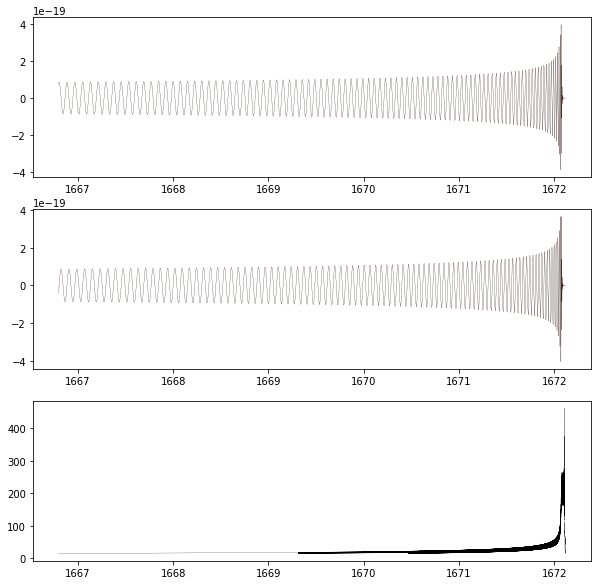

In [47]:
idx_flow15, = np.where(Foft_SI > 15.)

t_SI_flow15, hp_SI_flow15, hc_SI_flow15 = t_SI[idx_flow15], hp_SI[idx_flow15], hc_SI[idx_flow15]
t_SI_flow15_interp = np.arange(t_SI_flow15[0], t_SI_flow15[-1], 1/16834.)
dt_SI = np.mean(np.diff(t_SI_flow15_interp))
hp_SI_flow15_interp_obj = scipy.interpolate.interp1d(t_SI_flow15, hp_SI_flow15, fill_value=0., bounds_error=False)
hc_SI_flow15_interp_obj = scipy.interpolate.interp1d(t_SI_flow15, hc_SI_flow15, fill_value=0., bounds_error=False)
hp_SI_flow15_interp = hp_SI_flow15_interp_obj(t_SI_flow15_interp)
hc_SI_flow15_interp = hc_SI_flow15_interp_obj(t_SI_flow15_interp)

print dt_SI, np.diff(t_SI_flow15_interp)[0]

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(t_SI_flow15, hp_SI_flow15, 'k', lw=0.2)
plt.plot(t_SI_flow15_interp, hp_SI_flow15_interp, 'r--',alpha=0.2, lw=0.2)
plt.subplot(312)
plt.plot(t_SI_flow15, hc_SI_flow15, 'k', lw=0.2)
plt.plot(t_SI_flow15_interp, hc_SI_flow15_interp, 'r--',alpha=0.2, lw=0.2)
plt.subplot(313)
plt.plot(t_SI[idx_flow15], Foft_SI[idx_flow15], 'k', lw=0.2)

In [45]:
N = len(hp_SI_flow15_interp)
f_SI = np.fft.fftfreq(N, d=dt_SI)
df = np.mean(np.diff(f_SI))

Fp,Fc = detector.overhead_antenna_pattern(ra, dec, pol)
psd = pycbc.psd.aLIGOZeroDetHighPower(N, df, f_low)

-2.09698603756e-06


ValueError: delta_f must be a positive number

In [41]:
signal=Fp*hp_SI_flow15_interp+Fc*hp_SI_flow15_interp
signal_time=pycbc.types.timeseries.TimeSeries(signal,delta_t=dt_SI,dtype=float)
SNR=mfilter.sigma(signal_time,psd=psd,low_frequency_cutoff=20.)

print '... initial SNR:%f'%SNR

... initial SNR:9857.057934


In [42]:
r = SNR/SNR_req

hp_SI_rescaled = hp_SI_flow15_interp/r#hp_geom_interp*(M*lal.MTSUN_SI)/(r*1e6*lal.PC_SI/lal.C_SI)
hc_SI_rescaled = hc_SI_flow15_interp/r#hc_geom_interp*(M*lal.MTSUN_SI)/(r*1e6*lal.PC_SI/lal.C_SI)

signal=Fp*hp_SI_rescaled+Fc*hc_SI_rescaled
signal_time=pycbc.types.timeseries.TimeSeries(signal,delta_t=dt_SI,dtype=float)
SNR=mfilter.sigma(signal_time,psd=psd,low_frequency_cutoff=20.)

print '... rescaled distance: %f Mpc for a fixed SNR: %f'%(r, SNR)

... rescaled distance: 394.282317 Mpc for a fixed SNR: 51.468809
